<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Convolutional Neural Network (CNN) - CIFAR10 dataset**
---

![image](https://corochann.com/wp-content/uploads/2021/09/cifar10_plot_more-700x700-1.png)

### **Context**

In this study, we will build neural network with CNN. We will build a convolutional Neural Network (CNN) to classify image of objects in Cifar-10 dataset.


### **About CIFAR-10 dataset**

CIFAR-10 contains:

* 60,000 color images

* 32 × 32 pixels

* 3 color channels (RGB)

* 10 object classes (airplane, car, bird, cat, deer, dog, frog, horse, ship, truck)

![image](https://www.researchgate.net/profile/Abien-Fred-Agarap/publication/337731039/figure/fig3/AS:832268801171466@1575439753171/Figure-from-9-The-CIFAR-10-dataset-is-a-benchmark-image-classification-dataset-with-10.ppm)

### **Convolutional Neural Network (CNN)**

The CNN model is a type of deep neural network designed primarily for processing grid-structured data such as images. It uses convolutional layers to automatically extract spatial features (e.g., edges, textures, shapes) through local connections and shared weights, making it more efficient than fully connected networks for visual tasks.

**Initial setup**

In [1]:
# Importing libraries
import tensorflow as tf # Deeplearning frame work
from tensorflow import keras # Model building
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# style
plt.style.use('ggplot')

**Loading dataset**

In [2]:
# Loading dataset of CIFAR-10
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

**Checking data shape**

In [3]:
# Train data
X_train.shape

(50000, 32, 32, 3)

In [4]:
# Test data
X_test.shape

(10000, 32, 32, 3)

So, 50000 data will be used as training images and 10000 data will be used as testing images. The image width will be 32 x 32 (pixels). The last score of 3 represents the RGB color.

**Verifying the data**

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

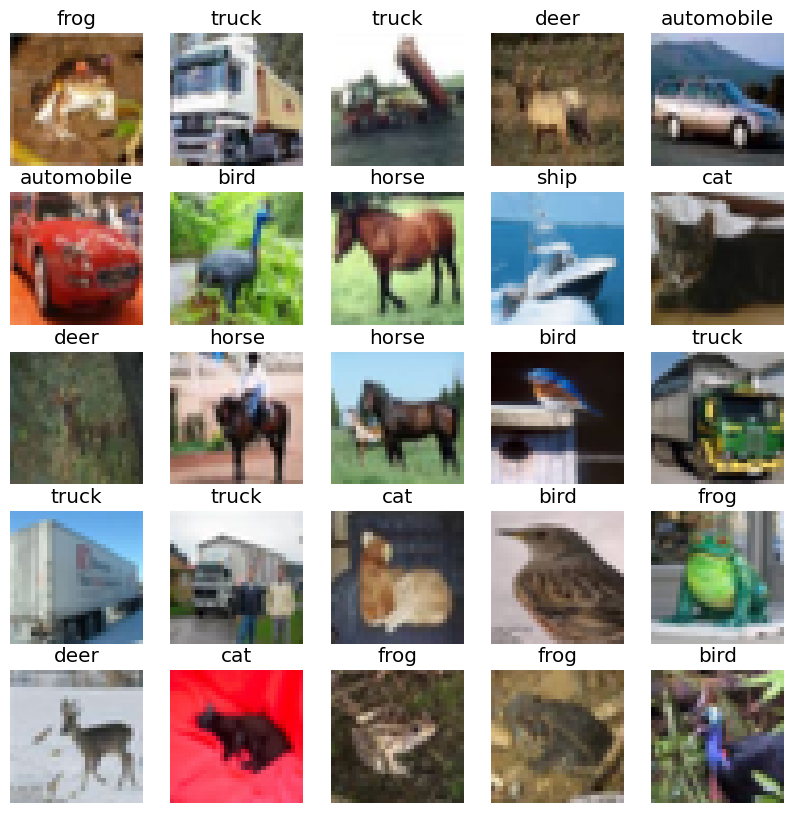

In [5]:
# Verifying the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Displaying six images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    # The CIFAR labels happen to be arrays, # we need the extra index
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

### **Data preprocessing**

We conduct data normalisation to improve model convergency process

In [6]:
# Data normalisation

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

### **Model building**

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. The color_channels refers to (R,G,B).

In [7]:
# CNN Model Architecture for CIFAR-10 (32x32x3 input)

model = keras.Sequential([

    # First Convolution Block
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),

    # Second Convolution Block
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    # Flattening
    keras.layers.Flatten(),

    # Fully Connected Layer
    keras.layers.Dense(128, activation='relu'),

    # Output Layer (CIFAR-10 has 10 output classes)
    keras.layers.Dense(10, activation='softmax')
])

**Compiling model**

In [9]:
# Compiling model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summarizing model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

We have about 315722 parameters to train.

### **Model training**

In [10]:
# Model training
# Model will be training with 10 epoch (number of iteration of all dataset)
historyCNN = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.4025 - loss: 1.6442 - val_accuracy: 0.6124 - val_loss: 1.1197
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6242 - loss: 1.0849 - val_accuracy: 0.6484 - val_loss: 1.0080
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.6812 - loss: 0.9148 - val_accuracy: 0.6763 - val_loss: 0.9461
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.7259 - loss: 0.7934 - val_accuracy: 0.6960 - val_loss: 0.8709
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7521 - loss: 0.7090 - val_accuracy: 0.6781 - val_loss: 0.9504
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7813 - loss: 0.6183 - val_accuracy: 0.6935 - val_loss: 0.9055
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8114 - loss: 0.5434 - val_accuracy: 0.6936 - val_loss: 0.9580
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.8348 -

### **Model evaluation**

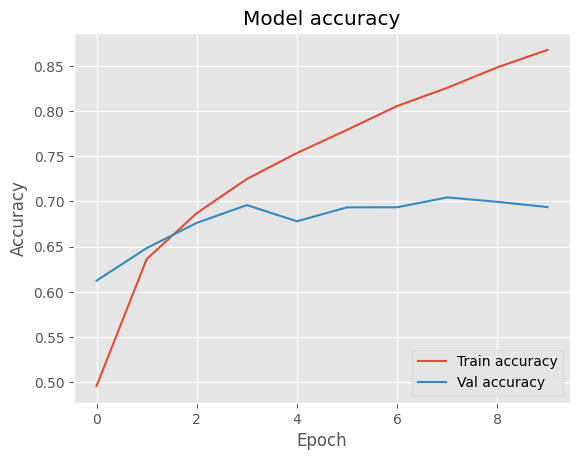

In [11]:
# Plotting accuracy
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()

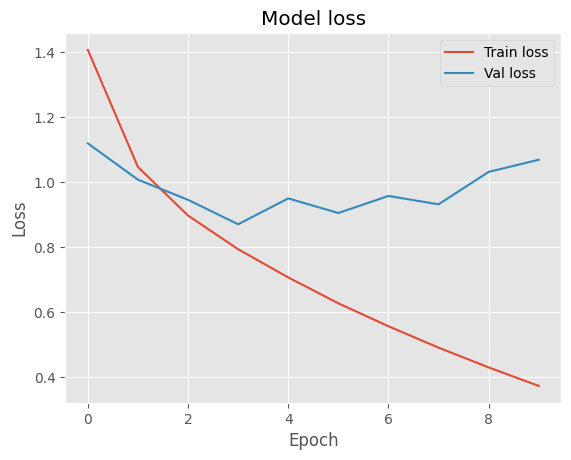

In [12]:
# Plotting loss
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

In [17]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Accuracy: {test_acc:.4f}')

313/313 - 3s - 9ms/step - accuracy: 0.6938 - loss: 1.0693
Accuracy: 0.6938


**Conclusion**

We have 69.4% accuracy. We may need to improve the model to further increase the accuracy.